Take Home Assignment 02: Liquid Level

1. Analyzing the liquid level of a vessel will be studied in this assignment
2. How to utilize background subtraction is demonstrated in the notebook
3. How to use subsequent thresholding and contour analysis is also demonstrated
4. The student's task is to implement the demonstrated techniques to obtain a liquid level plot for the entirety of the video

Notes:
It is advised to go over the opencv documentation for the following functions

cv2.threshold  :  https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html




Student has to deliver:
1. Plot of the liquid level.
2. A brief note on what the student understood by reading the section on Otsu's threholding method.
3. 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.
4. A brief description on the final algorithm developed by the student.


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

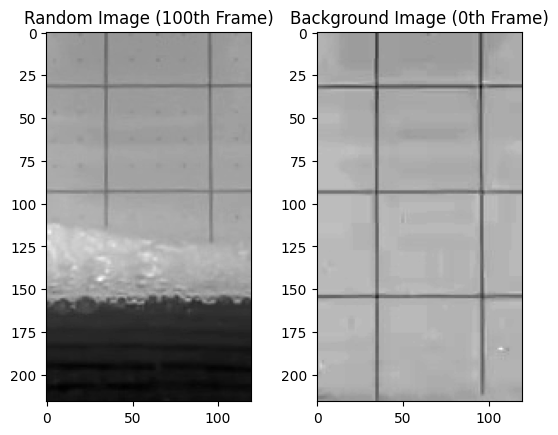

In [ ]:
# Importing Demo Images
img_r = cv2.imread('demo2_images/liquid_frame100.jpg', 0)
img_b = cv2.imread('demo2_images/liquid_frame000.jpg', 0)

# Display the images
plt.subplot(121), plt.imshow(img_r, cmap='gray'), plt.title('Random Image (100th Frame)')
plt.subplot(122), plt.imshow(img_b, cmap='gray'), plt.title('Background Image (0th Frame)')
plt.show()

Method 1 : Background Subtraction

Threshold Value: 50.0
Contour 0 Area: 6826.0
Contour 1 Area: 0.0
Contour 2 Area: 0.0
Largest Contour Size: 6826.0
Total Area: 25920
Percentage: 26.3 %


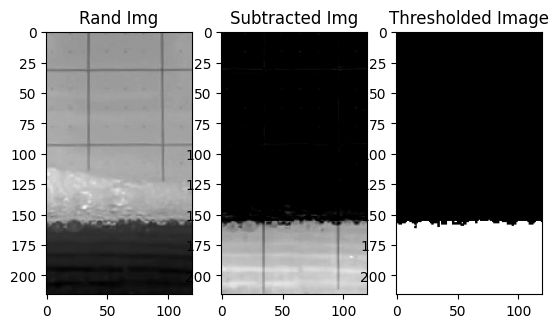

In [ ]:
# Subtracting the images
img_sub = cv2.subtract(img_b, img_r)

# Thresholding the image, to obtain binary image
ret, img_sub_thresh = cv2.threshold(img_sub, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# Print the used threshold value
print('Threshold Value:', ret)

# Find contours in the image
contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by size in descending order
contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
# Print the contour areas
for i in range(len(contours)):
    print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

# Find the area of the whole image
rows, cols = img_sub_thresh.shape
total_area = rows * cols
print('Total Area:', total_area)

# Calculate the percentage of the largest contour area, rounded to 1 decimal point
percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
print('Percentage:', percentage, '%')

# Display img_r , img_sub, img_sub_thresh side by side using plt
plt.subplot(131), plt.imshow(img_r, cmap='gray'), plt.title('Rand Img')
plt.subplot(132), plt.imshow(img_sub, cmap='gray'), plt.title('Subtracted Img')
plt.subplot(133), plt.imshow(img_sub_thresh, cmap='gray'), plt.title('Thresholded Image')
plt.show()

How to read video files

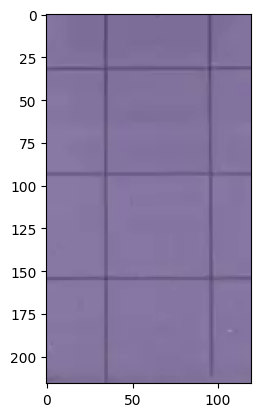

True

In [ ]:
# Reading frames from a video
cap = cv2.VideoCapture('demo2_images/liquidVideo.mp4')
ret, frame1 = cap.read()

# Displaying the first frame using plt
plt.imshow(frame1)
plt.show()



**Answers**

student (Egt20447) devaloped code

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Initialize video capture
cap = cv2.VideoCapture("demo2_images/liquidVideo.mp4")

# Read a reference image (img_b)
ret, img_b = cap.read()

# Check if the reference image was loaded successfully
if img_b is None:
    print("Error: Could not load reference image.")
    exit()

frame_numbers = []
percentages = []
frame_count = 0

while True:
    # Read a frame from the video
    ret, frame = cap.read()
    frame_count += 1

    if not ret:
        break

    # Subtracting the images
    img_sub = cv2.subtract(img_b, frame)

    # Convert img_sub to grayscale
    img_sub_gray = cv2.cvtColor(img_sub, cv2.COLOR_BGR2GRAY)

    # Thresholding the image, to obtain binary image
    ret, img_sub_thresh = cv2.threshold(img_sub_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Print the used threshold value
    print('Threshold Value:', ret)

    # Find contours in the image
    contours, hierarchy = cv2.findContours(img_sub_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


    if contours:
        # Sort the contours by size in descending order
        contours = sorted(contours, key=lambda x: cv2.contourArea(x), reverse=True)
        # Print the contour areas
        for i in range(len(contours)):
            print('Contour', i, 'Area:', cv2.contourArea(contours[i]))

        # Find the area of the whole image
        rows, cols = img_sub_thresh.shape[:2]
        total_area = rows * cols
        print('Total Area:', total_area)

        # Calculate the percentage of the largest contour area, rounded to 1 decimal point
        percentage = round((cv2.contourArea(contours[0]) / total_area) * 100, 1)
        print('Percentage:', percentage, '%')

        # Store the frame number and percentage
        frame_numbers.append(frame_count)
        percentages.append(percentage)

    # Optional: Display the processed frame (useful for debugging)
    cv2.imshow('Processed Frame', frame)
    img_sub_gray = cv2.cvtColor(img_sub, cv2.COLOR_BGR2GRAY)
    cv2.imshow('Processed Frame2',img_sub_gray)
    cv2.imshow('Processed Frame3', img_sub_thresh)

    # Exit early by pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

# Plot the frame number vs percentage
plt.plot(frame_numbers, percentages, marker='o')
plt.xlabel('Frame Number')
plt.ylabel('Percentage')
plt.title('Frame Number vs Percentage')
plt.show()

1. Plot of the liquid level.

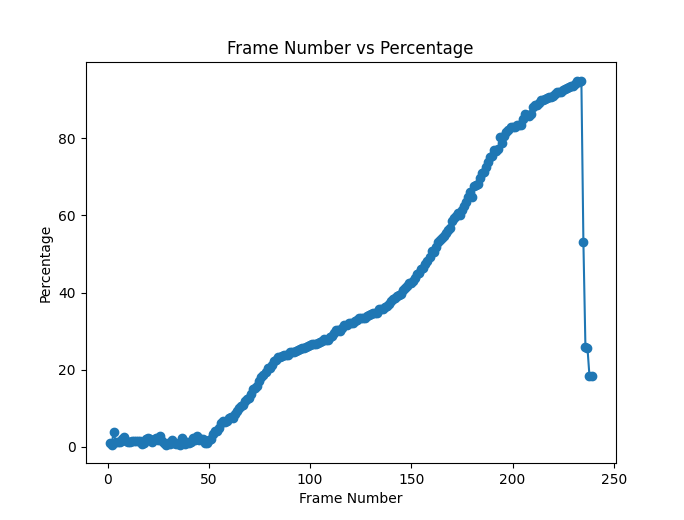


2. **A brief note on what the student understood by reading the section on Otsu's threholding method.**

  Otsu's method is an automatic thresholding technique used to separate the foreground from the background in grayscale images. It determines the optimal threshold value by maximizing the variance between two classes of pixels: those below and those above the threshold. In practice:

  Otsu’s method is particularly effective for images with bimodal histograms, where the pixel intensity distribution has two distinct peaks.
  However, it can struggle with noisy images or those without clear intensity separation, leading to inaccurate segmentation.


3. **examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.**

  Example 1: Shadows or Reflections

  Issue: Shadows or reflections on the liquid surface can appear as contours, which are misinterpreted as part of the liquid level.

  Annotation: Show an image where the shadow/reflection regions are highlighted as erroneous contours.

  Example 2: Poor Illumination or Blurry Edges

  Issue: Uneven lighting or a blurry liquid edge might lead to misclassification of background pixels as part of the liquid level.

  Annotation: Display an image where the detected contour does not align with the actual liquid edge, highlighting the misalignment.
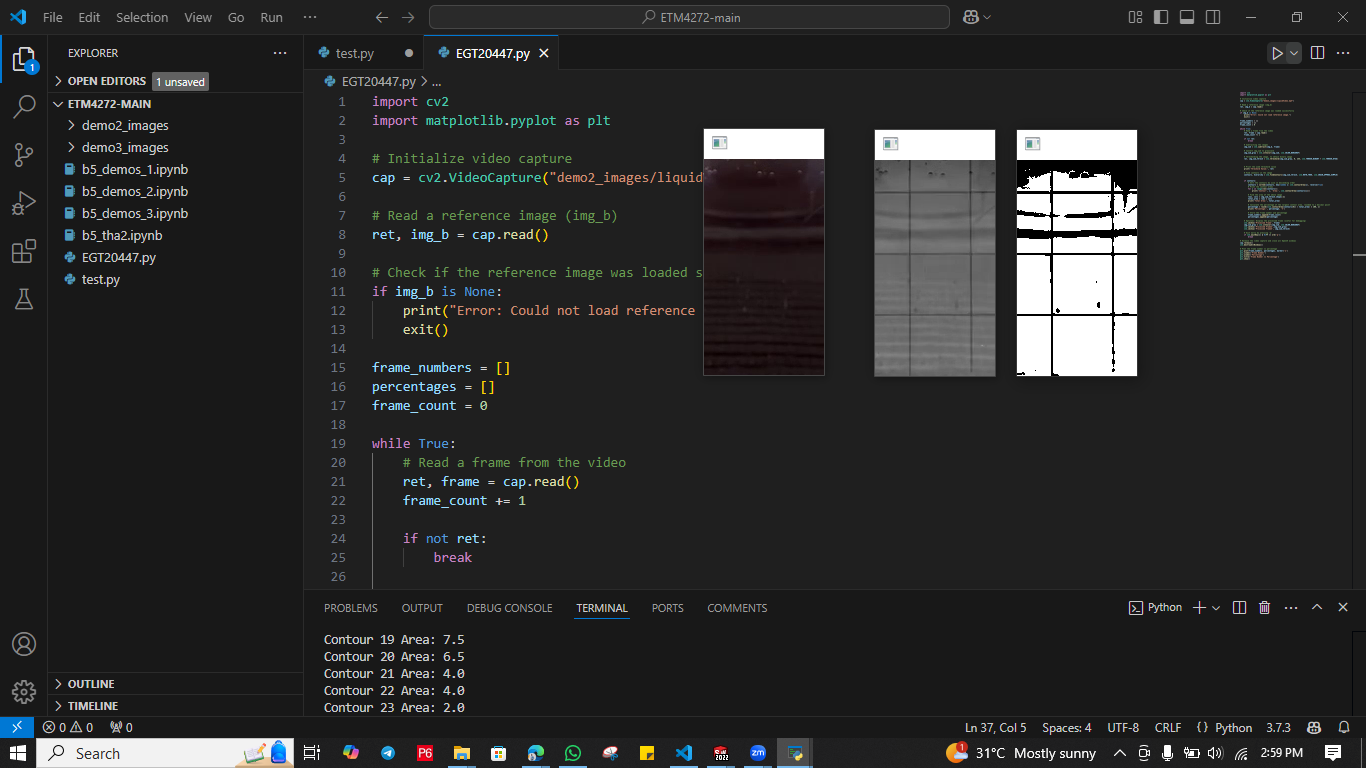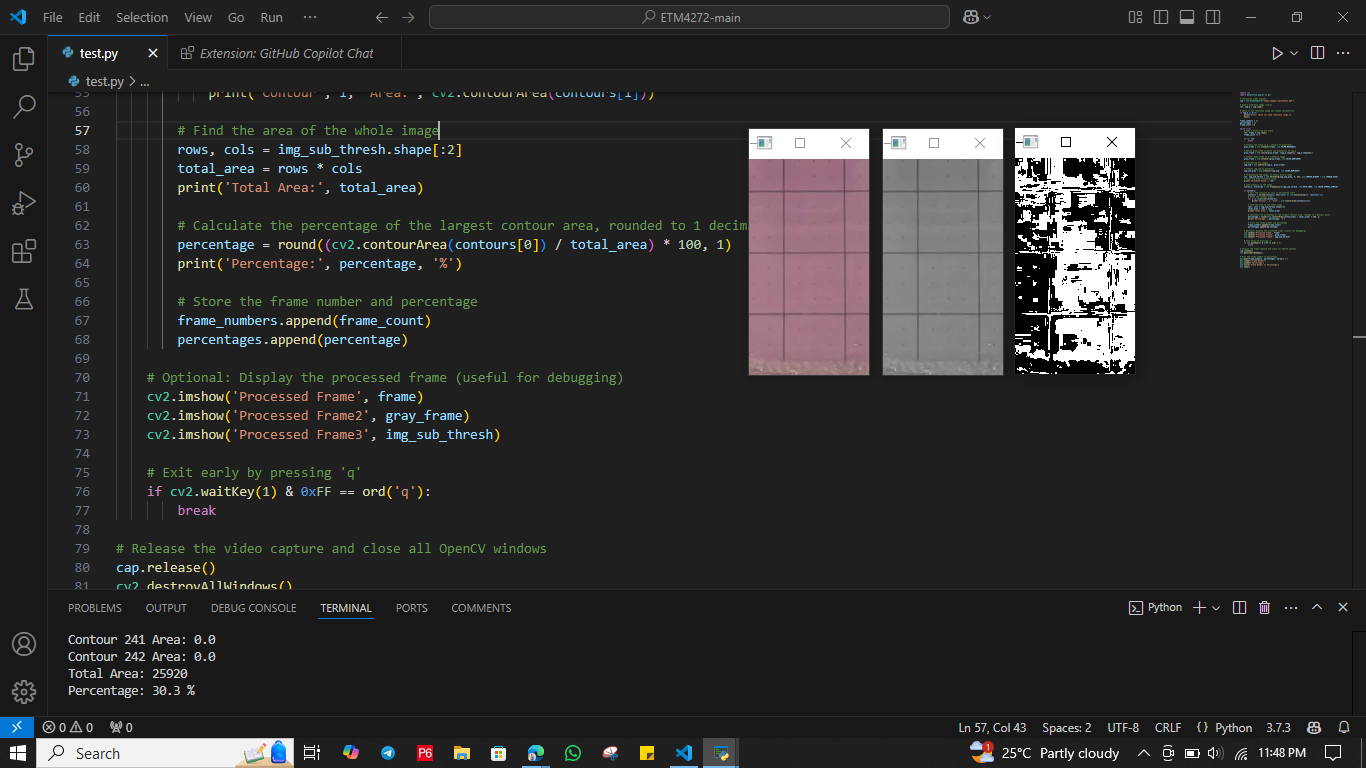

4. **A brief description on the final algorithm developed by the student**

The code processes a video to compare each frame with a reference frame and evaluates the percentage of change in the largest contour area, with the steps described below:

  1. Video Initialization:

  The video file demo2_images/liquidVideo.mp4 is loaded using OpenCV (cv2.VideoCapture).
  The first frame is used as a reference image (img_b) for subsequent comparisons.

  2. Frame Processing: For each frame in the video:

    **Image Subtraction:** The current frame is subtracted from the reference image to highlight differences between them using cv2.subtract.

    **Grayscale Conversion:**  The resulting difference image is converted to grayscale with cv2.cvtColor.

    **Thresholding:**   An Otsu thresholding technique is applied (cv2.threshold) to convert the grayscale image into a binary image, separating the foreground (differences) from the background.

    **Contour Detection:**  Contours in the binary image are detected using cv2.findContours.
    The contours are sorted by area, and the largest contour is analyzed.

    **Area Calculation:**  The area of the largest contour is computed and compared to the total frame area.
    The percentage of the frame occupied by the largest contour is calculated and stored.


  3. Data Collection:

  The algorithm keeps track of the frame numbers and the percentage area of the largest contour for visualization.

  4. Visualization:

  After processing the video, a plot is generated (using matplotlib) to show the percentage of the largest contour area across all processed frames.

  5. Optional Visualization:

  During execution, three intermediate frames (img_sub, img_sub_gray, img_sub_thresh) can be displayed for debugging and monitoring purposes.

  6. Early Exit:

  The program allows for early termination by pressing the 'q' key during frame processing.